# Importing the necessery libraries 

In [ ]:
from inverted_index import InvertedIndex
import nltk
from utils import read_data
nltk.download('stopwords')
inv_ind = InvertedIndex()

# Initialization done

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanyanakiev1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## We will now proceed to read the documents from the data folder

In [ ]:
documents = read_data("./shakespeare")
# Print the first 1 documents
print(documents[1])

## Print the number of the documents as well as their document title

In [ ]:
print(len(documents))
for i in documents:
    # Print document title
    print(i[0])

## Add documents to the inverted matrix

In [ ]:
for i in documents:
    # Add document to inverted index
    inv_ind.add_document(i)

## Print come descriptives so that we can verify everything works

In [ ]:
print(inv_ind.get_total_terms())
print(inv_ind.get_total_docs())

19202
39


## Generate a term by document matrix using log entropy

## Explanation of Log-Entropy and the 2 components of it
Log-Entropy is a statistical analysis of probabilities and calculation of a surprise "index" when certain event occurs. For example 
if a certain event has 90% chance to occur then the Log-Entropy of that event will be low since the surprise factor will be low.

### Component 1
1. This is the logarithm of the term frequency of i in document j. The term frequency can be better described as the probability of term i to occur in document j.
Since this term occurs multiple times throughout one document (potentially or 0) we will need to multiply the natural log of it to the next component.

### Component 2
2. The second term can be interpreted as the actual amount of surprise given a discrete variable X and it's probability P(X). In order to compute the surprise
we need the frequency of the term in the current document in regards to the total fequency.This number will of course be less than 1 and can be interpreted as yet another probability of occurance of the discrete variable X or in our case the term. We then divide by the log of the total number of documents and this final value tha we would have would represent the surprise of occurance of term i. If surprise is low then probability was high, if surprise is high then probability was low.


In [ ]:
inv_ind.calcLogEntropy()
inv_ind.generate_term_by_doc_matrix(log_entropy=True)

### Perform a search query: "scotland kings and thanes" using the Log-Entropy weighting scheme

In [ ]:
result = inv_ind.search("scotland kings and thanes",log_entropy=True,cos_com = True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.08125832307223263)
('King Henry VI', 0.05285631221650191)
('King Henry IV', 0.04843688273821305)
('King Henry IV, II', 0.0437494969667432)
('King Henry V', 0.04349379911220774)
('King John', 0.042025784090852)
('King Richard III', 0.041866942849330506)
('King Richard II', 0.040980100636253944)
('King Henry VIII', 0.03927005693835226)
('King Lear', 0.03897795826135576)


## Generate term by document matrix without using TF model only

In [ ]:
inv_ind.generate_term_by_doc_matrix()

### Test on the same data set with the same query and print top 10 results

In [ ]:
result = inv_ind.search("scotland kings and thanes",cos_com=True)
for i in range(0,10):
    print(result[i])

('King Henry V', 0.2659215354074205)
('King Henry VI', 0.2617837075388672)
('King John', 0.2472493685181954)
('King Richard II', 0.2253953514359277)
('King Lear', 0.20415867029886436)
('King Henry VIII', 0.1998881836179047)
('King Richard III', 0.18418950223762484)
('Hamlet', 0.1241932011402115)
("All's Well that Ends Well", 0.11190811971898096)
('King Henry IV', 0.10791586179996365)


## Generate term by doc matrix using the TF-IDF model

In [ ]:
inv_ind.calcTFIDF()
inv_ind.generate_term_by_doc_matrix(tfidf=True)

### Test again on the same query and print the top 10 results

In [ ]:
result = inv_ind.search("scotland kings and thanes",tfidf= True,cos_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.08559316237351267)
('King Henry IV', 0.005789261723483593)
('King Henry VI', 0.003660436049077642)
('King Henry IV, II', 0.003121709934588564)
('King Henry V', 0.0019193400093131976)
('King Richard III', 0.0013431147327243318)
('King John', 0.0007488196759316429)
('King Richard II', 0.0006742482860831404)
('King Henry VIII', 0.0005161221482695165)
('The Comedy of Errors', 0.00046244490997942336)


## Does Log-Entropy work better than or worse than TF and TF-IDf
1. It performs better than TF. Although from the results we can see that TF clearly has the higher values TF tends to favor longer documents because of how likely there is for a term to be repeated. Longer document can contain higher frequency of the term but this strategy can quickly results in weird results.
2. Log-Entropy is calculated based on probabilities and tries to determine the surprise of seeing a term, in its calculation more factors are accounted for
such as frequency in current document or we can refer to this as local frequencey, and also a global frequency. It takes the inverse of those in order to calculate the overall surprise of seeing this term in the document.
3. From looking at the test data we can infer that TF-IDF manages to guess correctly the first result "Macbeth" however for the  lower ones the values are 10 times smaller than the ones produced by the Log-Entropy-model we can observe that for "example King Henry IV" has value of 0.0057.. when using TF-IDf and the same document has 0.0506.. when using the Log-Entropy model. this is consistent throughout the results and can conclude thjat Log-Entropy performs better
They are very similar in nature and the rankings are also nearly the same only with few rotations here and there.

### Conclusion
From this we can conclude that the Log-Entropy model performs better for information retrieval task than both IF and TF-IDF model. The TF model is a subject for potential outliers in the results and specifically in our case due to the lenght of the documents the results cannot be trusted. By comparing the results of the TF-IDF model and the Log-Entropy one we can conclude that Log-Entropy performs better in the tens of times when retrieving the value. Although the document names have the same names in the top 10, their respective values are different. Due to the nature of the Log-Entropy algorithm and taking into account both the local document frequency and the global one. By taking the inverse and calculating for the surprise we are abel to extract more accurate results and thus perform better at the taks of information retrieval.

# Start of part B Comparision Metrics

## Results for the "scotland kings and thanes" but using TF method with Euclidian Distance as comparison

In [ ]:
inv_ind.generate_term_by_doc_matrix()
result = inv_ind.search("scotland kings and thanes",euc_com=True)
for i in range(0,10):
    print(result[i])

('King Richard III', 977.6604727613774)
('Hamlet', 971.3871524783515)
('Antony and Cleopatra', 964.5123120002149)
('The Merry Wives of Windsor', 960.9146684279515)
('King Henry VI', 919.2197778551113)
('Othello', 895.3379250316609)
('King Lear', 876.3121589935861)
('Romeo and Juliet', 845.559578031022)
('Troilus and Cressida', 825.5434573661158)
('Twelfth Night', 811.7604326400739)


## Result for "scotland kings and thanes" using TF method with Pearson Correlation comparison

In [ ]:
inv_ind.generate_term_by_doc_matrix()
result = inv_ind.search("scotland kings and thanes",pear_com=True)
for i in range(0,10):
    print(result[i])

('King Henry V', 0.2672845942825284)
('King Henry VI', 0.2622711970288366)
('King John', 0.24811350038380806)
('King Richard II', 0.22584782757537913)
('King Lear', 0.2043933444230227)
('King Henry VIII', 0.20024547381711125)
('King Richard III', 0.18424924447980878)
('Hamlet', 0.1236542810671274)
("All's Well that Ends Well", 0.11126105942900251)
('King Henry IV', 0.10723385272717546)


## Results for "scotland kings and thanes" using TF method with Spearman Correlation comparison

In [ ]:
inv_ind.generate_term_by_doc_matrix()
result = inv_ind.search("scotland kings and thanes",spear_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.03532054253793877)
('King Henry VI', 0.02056523596193464)
('King Henry IV', 0.0197997185617009)
('King Henry IV, II', 0.018928390837357485)
('King Richard III', 0.017342569082006154)
('King Henry V', 0.01604597635712879)
('Venus and Adonis', 0.009664535381060973)
('The Two Gentlemen of Verona', 0.009040721972581985)
('Julius Caesar', 0.0088873026121942)
("A Midsummer Night's Dream", 0.008704179445923764)


## Results for "scotland kings and thanes" using TF method with Kendalltau Correlation comparison

In [ ]:
inv_ind.generate_term_by_doc_matrix()
result = inv_ind.search("scotland kings and thanes",kend_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.034490292449206136)
('King Henry VI', 0.020010318113788995)
('King Henry IV', 0.019238387544410433)
('King Henry IV, II', 0.01836938638832853)
('King Richard III', 0.016809590392667405)
('King Henry V', 0.015525963742231627)
('Venus and Adonis', 0.009499276286462178)
('The Two Gentlemen of Verona', 0.008857128237286477)
('Julius Caesar', 0.008692949097421564)
("A Midsummer Night's Dream", 0.008514257708386385)


## Results for "scotland kings and thanes" using TF-IDF method with Cosine comparison

In [ ]:
inv_ind.calcTFIDF()
inv_ind.generate_term_by_doc_matrix(tfidf=True)
result = inv_ind.search("scotland kings and thanes",tfidf=True,cos_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.08559316237351267)
('King Henry IV', 0.005789261723483593)
('King Henry VI', 0.003660436049077642)
('King Henry IV, II', 0.003121709934588564)
('King Henry V', 0.0019193400093131976)
('King Richard III', 0.0013431147327243318)
('King John', 0.0007488196759316429)
('King Richard II', 0.0006742482860831404)
('King Henry VIII', 0.0005161221482695165)
('The Comedy of Errors', 0.00046244490997942336)


## Results for "scotland kings and thanes" using TF-IDF method with Euclidian Distance comparison

In [ ]:
inv_ind.calcTFIDF()
inv_ind.generate_term_by_doc_matrix(tfidf=True)
result = inv_ind.search("scotland kings and thanes",tfidf=True,euc_com=True)
for i in range(0,10):
    print(result[i])

('Othello', 2313.804683163437)
('Hamlet', 2128.5463172732448)
('Romeo and Juliet', 1643.958329944851)
('The Comedy of Errors', 1576.43129759391)
('Antony and Cleopatra', 1557.9792548385071)
('Coriolanus', 1450.629988237387)
('Much Ado About Nothing', 1445.1940892475636)
('The Taming of the Shrew', 1413.4832010388948)
('King Lear', 1398.5151181162375)
('Twelfth Night', 1376.936135012816)


## Results for  "scotland kings and thanes " using TF-IDF method with Pearson Correlation comparison

In [ ]:
inv_ind.calcTFIDF()
inv_ind.generate_term_by_doc_matrix(tfidf=True)
result = inv_ind.search("scotland kings and thanes",tfidf=True,pear_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.085276031075067)
('King Henry IV', 0.00499587037881998)
('King Henry VI', 0.0030334509766846754)
('King Henry IV, II', 0.002305429653845607)
('King Henry V', 0.000706020794811581)
('King Richard III', 0.000569856310975516)
('The Comedy of Errors', 0.00014917529515633688)
('King John', -7.489866921212896e-05)
('King Richard II', -9.28480895975576e-05)
('King Lear', -0.00015336795675105952)


## Results for "scotland kings and thanes" using TF-IDF method with Spearman Correlation comparison

In [ ]:
inv_ind.calcTFIDF()
inv_ind.generate_term_by_doc_matrix(tfidf=True)
result = inv_ind.search("scotland kings and thanes",tfidf=True,spear_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.036420436164218965)
('King Henry VI', 0.021972117363796787)
('King Henry IV', 0.020817278255975652)
('King Henry IV, II', 0.02033084175768478)
('King Richard III', 0.019166629749296595)
('King Henry V', 0.017544354963120817)
('The Comedy of Errors', 0.010176917030723768)
('Pericles, Prince of Tyre', 0.009091297196061441)
('The Tempest', 0.008736134120417986)
("All's Well that Ends Well", 0.008709652101952932)


## Results for "scotland kings and thanes" using TF-IDF method with Kendalltau Correlation comparison

In [ ]:
inv_ind.calcTFIDF()
inv_ind.generate_term_by_doc_matrix(tfidf=True)
result = inv_ind.search("scotland kings and thanes",tfidf=True,kend_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.03523465545665811)
('King Henry VI', 0.021210117914223326)
('King Henry IV', 0.02002075274652375)
('King Henry IV, II', 0.01952294415089923)
('King Richard III', 0.01841449049251854)
('King Henry V', 0.01677494228893398)
('The Comedy of Errors', 0.009925278143188712)
('Pericles, Prince of Tyre', 0.00880534823826268)
('The Tempest', 0.0084627849544873)
("All's Well that Ends Well", 0.008417771439265632)


## Results for "scotland kings and thanes" using Log-Entropy with Cosine comparison

In [ ]:
inv_ind.calcLogEntropy()
inv_ind.generate_term_by_doc_matrix(log_entropy=True)
result = inv_ind.search("scotland kings and thanes",log_entropy=True,cos_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.08125832307223263)
('King Henry VI', 0.05285631221650191)
('King Henry IV', 0.04843688273821305)
('King Henry IV, II', 0.0437494969667432)
('King Henry V', 0.04349379911220774)
('King John', 0.042025784090852)
('King Richard III', 0.041866942849330506)
('King Richard II', 0.040980100636253944)
('King Henry VIII', 0.03927005693835226)
('King Lear', 0.03897795826135576)


## Results for "scotland kings and thanes" using Log-Entropy with Pearson Correlation comparison

In [ ]:
inv_ind.calcLogEntropy()
inv_ind.generate_term_by_doc_matrix(log_entropy=True)
result = inv_ind.search("scotland kings and thanes",log_entropy=True,pear_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.08156054032189908)
('King Henry VI', 0.051605605712695374)
('King Henry IV', 0.047006401036155776)
('King Henry IV, II', 0.042032196780564746)
('King Henry V', 0.04184479083805358)
('King John', 0.04015032688360074)
('King Richard III', 0.04001577687060242)
('King Richard II', 0.03904428730024904)
('King Henry VIII', 0.03723365743033406)
('King Lear', 0.03693947998513143)


## Results for "scotland kings and thanes" using Log-Entropy with Spearman Correlation comparison

In [ ]:
inv_ind.calcLogEntropy()
inv_ind.generate_term_by_doc_matrix(log_entropy=True)
result = inv_ind.search("scotland kings and thanes",log_entropy=True,spear_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.035258931701249135)
('King Henry VI', 0.020503251989715365)
('King Henry IV', 0.01975031555048543)
('King Henry IV, II', 0.018822821599299003)
('King Richard III', 0.017588416044481747)
('King Henry V', 0.01615550498149311)
('Venus and Adonis', 0.009779992965607805)
('The Two Gentlemen of Verona', 0.009167054266153378)
('Julius Caesar', 0.008956322483774804)
("A Midsummer Night's Dream", 0.008747505834734466)


## Results for "scotland kings and thanes" using Log-Entropy with Kendalltau Correlation comparison

In [ ]:
inv_ind.calcLogEntropy()
inv_ind.generate_term_by_doc_matrix(log_entropy=True)
result = inv_ind.search("scotland kings and thanes",log_entropy=True,kend_com=True)
for i in range(0,10):
    print(result[i])

('Macbeth', 0.03402417671638764)
('King Henry VI', 0.019743560783881734)
('King Henry IV', 0.018947512195418667)
('King Henry IV, II', 0.018030020711871184)
('King Richard III', 0.016856356889736496)
('King Henry V', 0.01540857271958265)
('Venus and Adonis', 0.009513073097543236)
('The Two Gentlemen of Verona', 0.008902906609693985)
('Julius Caesar', 0.008689053776713241)
("A Midsummer Night's Dream", 0.00846780113554633)


## Results for  "scotland kings and thanes" using Log-Entropy with Euclidian comparison

In [ ]:
inv_ind.calcLogEntropy()
inv_ind.generate_term_by_doc_matrix(log_entropy=True)
results =inv_ind.search("scotland kings and thanes",log_entropy=True,euc_com=True)
for i in range(0,10):
    print(results[i])

('Hamlet', 85.32002664372844)
('King Richard III', 84.92979166562485)
('Cymbeline', 83.08784239605335)
('King Henry V', 82.59917327623366)
('Coriolanus', 81.42924249517287)
('King Lear', 81.3403006315744)
('Troilus and Cressida', 81.24289124095665)
('King Henry IV, II', 81.15873011312806)
('Antony and Cleopatra', 80.19180979656967)
('Othello', 79.36817702596657)


## Results from the overall experiment
The comparison operators that we have implemented are as follows:
1. Spearman
2. Pearson
3. Kendall Tau
4. Euclidian

From using the 4 comparison operations that we have implemented plus as a baseline the Cosine comparison that was already implemented we can observe some of the ofllowing patters:
1. Generally Pearson and Consine comparison produce very similar results
2. Spearman and Kendall Tau also produce very similar once
3. Euclidian Distance produced the most different from all 4 of them

## Why does this difference occur and from where?
Well pearson correlation is best used on data to find the linear relationship between two variables. It works well on data set where we can see to some extend a linear relationship, if however one that resembles a curve occurs this coefficient does not do well enough. Spearman on the other hand is used to     evaluate the monothonic relationship and is based on ranking rather than the raw data. This is also the case for Kendall wehre is represents monothonic relationships. In all three cases the closer the value is to 1 the stronger the similarity, the closer it is to -1 the lower the similarity. For the Euclidian Distance well the closer to 0 the smaller the distance the bigger the value the greater the distance. Euclidian distance produced the most different results. This might be contributed that it only takes the raw values into account when calculating the difference of two vectors and that is simply not enough to represent accurately the most relevant results.

## Which one should be considered the best and why and which one the worst
From our observation we can see highest similarity scores when using either Pearson of Cosine comparison. It can be concluded that these two work the best. The vectors of both the documents and the query if plotted represent normal distribution with big bell curve at the start of the graph. This is because we have a sparse matrix. Although strong lean tot he left of the bell curve we still can assume that there exists some liner relationships in the data, this is why the Pearson coefficient works very well and also the fact that is using the raw data rather than ranking like Spearman and Kendall Tau use. These 2 algorithms work well when representing monothonic relationships. Euclidian Distance also does not work well since it takes into account only the distance between the 2 vectors, but there is no normalization step or something like this. This makes it so it does not represent even close to accurate data when retrieving the results. Thus we can conclude that both Pearson and Cosine comparison work very well, Spearman and Kendall Tau produce less optimal results and that can be seen both from the quantatative results and the titles of the docuemnts themself.

## Histograms to prove the point about the distribution of a random vector i from the documents

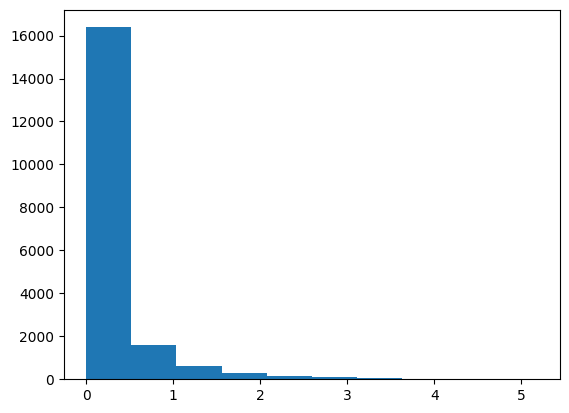

In [37]:
import matplotlib.pyplot as plt
v = inv_ind.get_doc_vector(2)
plt.hist(v)
plt.show()

## Histogram of the distrbution of the query vector "scotland kings and thanes"

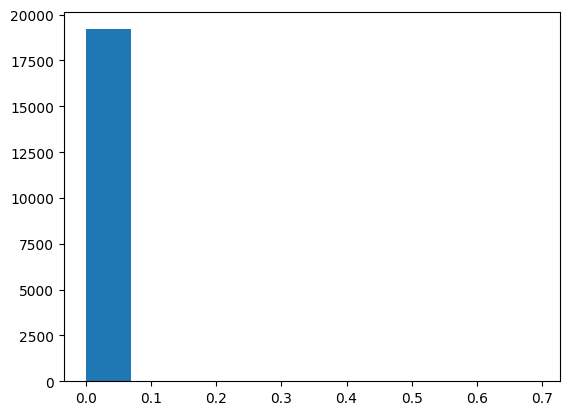

In [39]:
query = "scotland kings and thanes"
v = inv_ind.create_query_vector(query,log_entropy=True)
plt.hist(v)
plt.show()